In [4]:
import glob
from skimage import io
from skimage import color
from skimage.transform import resize
from matplotlib import pyplot as plt
import cv2
import numpy as np
from sklearn.decomposition import PCA
%load_ext autoreload
%autoreload 2
import predict
%matplotlib inline

In [6]:
import predict

traindir = 'data/MYDATA/train/'
X, y, processed_images, original_images = predict.get_custom_data(traindir, (28, 28))

# fn = 'data/MYDATA/train/449_j.png'
# image = io.imread(fn)
# plt.imshow(image, cmap="Greys_r")
# plt.show()

# irawsymbols = predict.file_to_raw_symbols(fn, True)

# for image, symbol in zip(trainimages, ytrain):
#     plt.imshow(image, cmap="Greys_r")
#     plt.title(symbol)
#     plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier

transforms = [
    PCA(n_components=3),
    PCA(n_components=5),
    PCA(n_components=10),
    PCA(n_components=15),
    PCA(n_components=20),
    PCA(n_components=25),
    PCA(n_components=30),
    PCA(n_components=35)
]

models = [
    MLPClassifier(max_iter=300),
    MLPClassifier(hidden_layer_sizes=(100,100), max_iter=300),
    SVC(),
    SVC(decision_function_shape='ovo'),
    LinearSVC(),
    AdaBoostClassifier(n_estimators=100)
]

for ts in transforms:
    ts.fit(X)

bscore = 0
for model in models:
    for ts in transforms:
        Xts = ts.transform(X)
        score = np.mean(cross_val_score(model, Xts, y, cv=5))
        if(score > bscore):
            bmodel = model
            bts = ts
            bscore = score

In [3]:
print(bscore)
print(bts)
print(bmodel)

NameError: name 'bscore' is not defined

In [96]:
from sklearn.externals import joblib

Xtrain_ts = bts.transform(Xtrain)
bmodel.fit(Xtrain_ts, ytrain)
print(bmodel.score(Xtrain_ts, ytrain))

joblib.dump(bmodel, 'MLPCustom2.p')
joblib.dump(bts, 'PCACustom2.p')

1.0


['PCACustom2.p']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


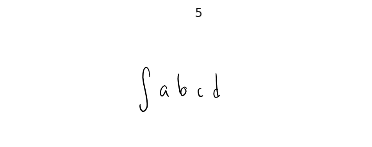

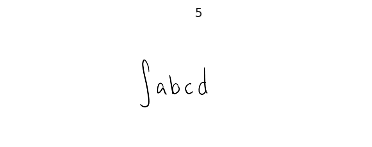

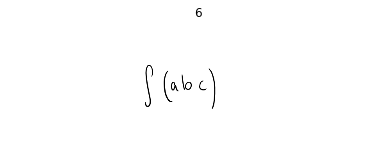

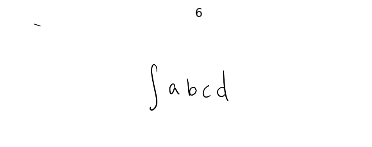

In [8]:
from skimage import measure
from skimage import morphology
from skimage import filters
from skimage import feature
from scipy import ndimage as ndi
from skimage import io
from skimage import color
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import predict
import glob

def find_label(image, label):
    image_th = image.copy()
    image_th[image == label] = 1
    image_th[image != label] = 0
    nz = np.nonzero(image_th)
    rowmin = np.min(nz[0])
    rowmax = np.max(nz[0])
    colmin = np.min(nz[1])
    colmax = np.max(nz[1])
    return rowmin, rowmax, colmin, colmax

for name in glob.glob('data/MYDATA/overall/*.png'):
    ioverall = io.imread(name)
    isymbols = predict.overall_to_symbols(ioverall)
    plt.imshow(ioverall, cmap="Greys_r")
    plt.title(len(isymbols))
    plt.axis('off')
    plt.show()